# Import all dependencies

In [41]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
import cv2
import sys
from tensorflow import keras
sys.path.insert(0,"./utils")
import util
import numpy as np
from numpy import asarray

# Load two best model 
- Logistic Regression with two-layer neural network 
- Convolutional Neural Network with VGG architecture

In [42]:
two_layer_NN_logis = keras.models.load_model('./Logistic-Regression-Model/logistic-regression-2layer-CPU/model/two-layer-model')
VGG_CNN = keras.models.load_model('./Convolutional-NN-Model/cnn_with_dropout_batchnorm_750ep/model/cnn-model-3')


## Summary for two model 
- Logistic Regression

In [43]:
two_layer_NN_logis.summary()

Model: "two_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 1410)              4332930   
                                                                 
 dense_4 (Dense)             (None, 705)               994755    
                                                                 
 dense_5 (Dense)             (None, 100)               70600     
                                                                 
Total params: 5,398,285
Trainable params: 5,398,285
Non-trainable params: 0
_________________________________________________________________


- Convolutional NN :
<img src="./images/VGG.png" />

In [44]:
VGG_CNN.summary()

Model: "VGG"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                               

# Preprocessing Image 
- Original Image :


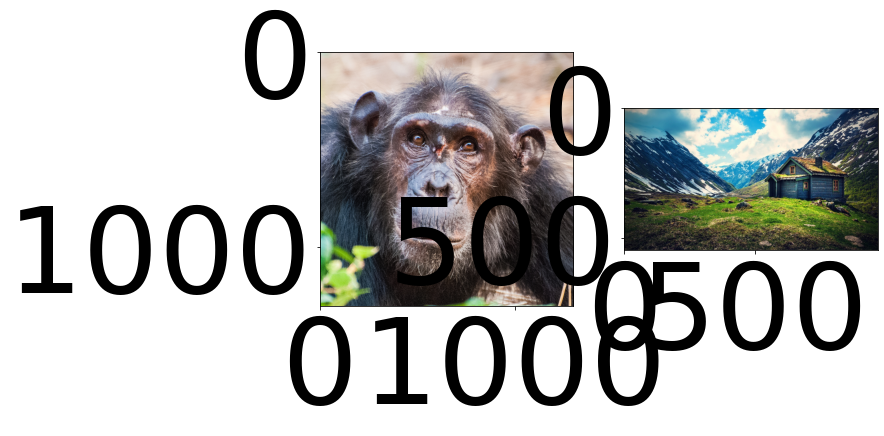

In [45]:
chimp_img=cv2.imread("./data/Chimp1_small_0.jpg")
mh_img=cv2.imread("./data/high-res-mountain_house.jpg")
chimp_img = cv2.cvtColor(chimp_img,cv2.COLOR_BGR2RGB)
mh_img = cv2.cvtColor(mh_img,cv2.COLOR_BGR2RGB)
f, axarr = plt.subplots(1,2,figsize=(10,10))
axarr[0].imshow(chimp_img)
axarr[0].tick_params(axis='both', which='major', labelsize=10)
#axarr[1].figure(figsize=(8,6))
axarr[1].imshow(mh_img)
axarr[1].tick_params(axis='both', which='major', labelsize=10)


# img=cv2.resize(img,(32,32))
# plt.imshow(img)

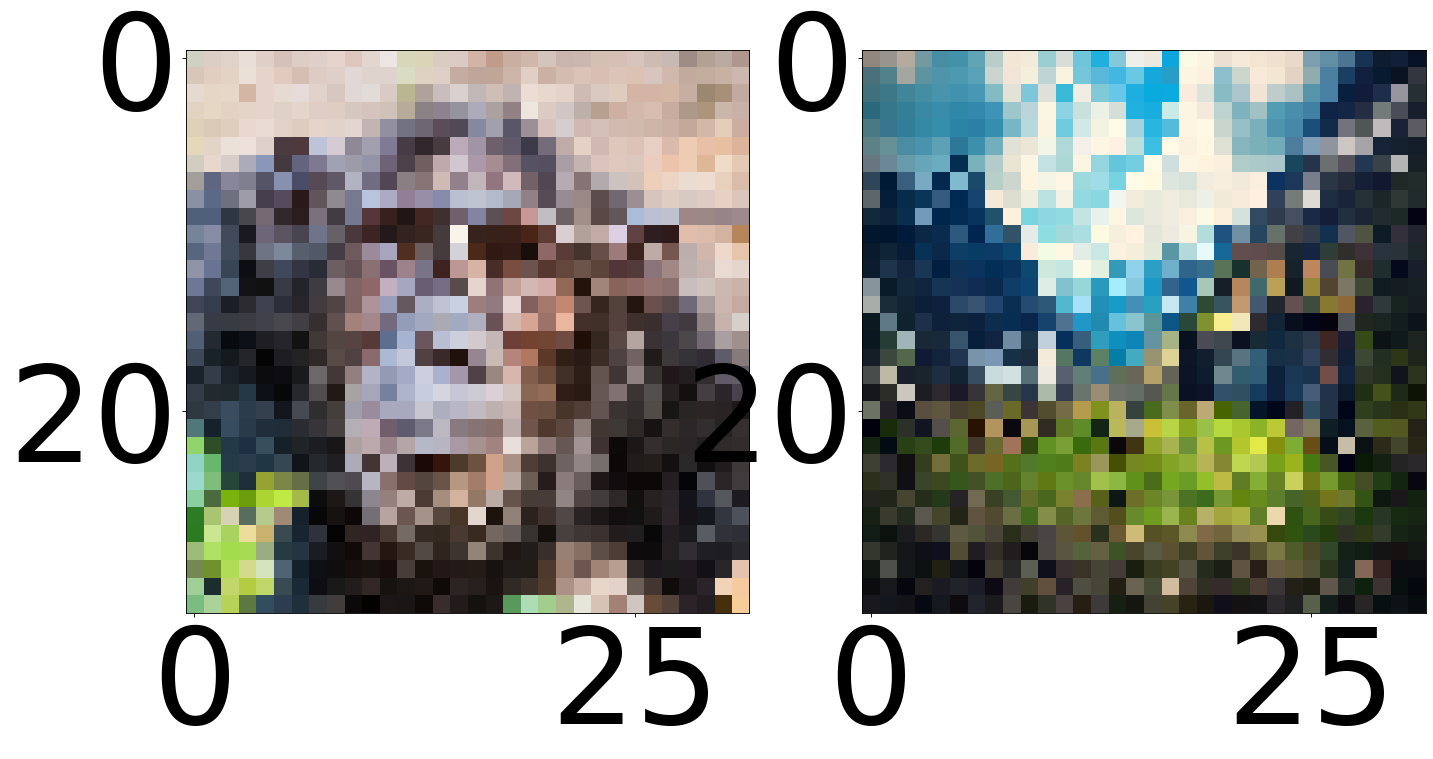

In [46]:
f, axarr = plt.subplots(1,2,dpi=80,figsize=(20,20))
processed_chimp = cv2.resize(chimp_img,(32,32))
processed_mh = cv2.resize(mh_img,(32,32))
axarr[0].imshow(processed_chimp)
axarr[0].tick_params(axis='both', which='major', labelsize=10)
axarr[1].imshow(processed_mh)
axarr[1].tick_params(axis='both', which='major', labelsize=10)

In [47]:
result = VGG_CNN.predict(util.load_image(processed_chimp))
list_label = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
res = result[0].tolist()
ind = max(res)
print("prediction:",list_label[res.index(ind)])

1/1 [==============================] - 1s 849ms/step
prediction: leopard
